# Lecture 10

Today we will continue to learn about about the randomness, which can come from either
* Simulations that use randomness.
* Real life data that have randomness.

Two most common descriptive statistics are: 
* Mean (average);

* Standard deviation (how spread the data are). 


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import random # random module is imported
print(random.random()) # first random is the module name, second random is the function
# generate a random number between 0 to 1
print(random.uniform(4,5))

0.1959816223759152
4.177326681433111


In [6]:
import random as rd # random module is imported
print(rd.random()) # first random is the module name, second random is the function
# generate a random number between 0 to 1
print(rd.uniform(4,5))

0.43262470806510334
4.0107600977870455


## Remark:
For our class, we want to use `numpy.random` to generate random numbers.

In [7]:
# numpy array with uniform random numbers
# np.random.uniform()
arr1 = np.random.uniform(low=0, high=2, size=9)
print(arr1)

[0.95543986 1.29015735 0.25555349 0.15399015 0.06061757 1.64304743
 1.07826345 1.11696082 1.69503461]


In [8]:
arr2 = np.random.uniform(low=0,high=1, size=(3,3))
print(arr2)

[[0.04944835 0.01782275 0.15435887]
 [0.44371206 0.87068084 0.40178209]
 [0.42607853 0.08286657 0.904847  ]]


There are two function for normal distribution: `random.normal()` and `random.randn()`.

In [12]:
# numpy array with Gaussian (normal) random numbers
np.random.normal()
np.random.seed(42)
np.random.normal(loc=0.0, scale=1.0, size=(2,3))
# below are samples drawn from this distrubtion

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696]])

In [13]:
# np.random.randn() returns r.v. ~ N(0,1)
np.random.seed(42)
np.random.randn(2,3)

array([[ 0.49671415, -0.1382643 ,  0.64768854],
       [ 1.52302986, -0.23415337, -0.23413696]])

What if we want to use `random.randn()` in numpy to generate normal distribution with mean $\mu$ and standard dev $\sigma$?
<br><br>
*HINT* : $ (X -\mu)/\sigma \sim \mathcal{N}(0,1)$.

In [16]:
# answer
X = 2*np.random.randn(3,3) + 5 # samples drawn from N(5,2)
print(X)

[[3.91123455 5.22184518 2.69801285]
 [5.75139604 3.79872262 4.4166125 ]
 [3.79658678 8.70455637 4.97300555]]


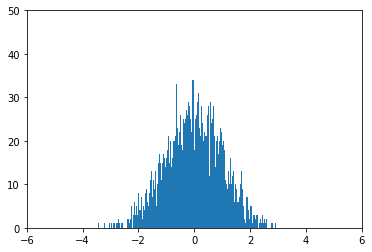

In [40]:
N = 5000 # sample size
mu = 0.0
sigma = 1.0  # highers standard dev

X = np.random.normal(loc=mu, scale=sigma, size=N)
plt.axis([-6, 6, 0, N/100])
plt.hist(X, bins = 500) # bin size = (total sample)/(bins)
plt.show()

## Exercise
Change `scale` parameter from 0.5, 1, 2, 10, then plot the histogram.


## Choice: chooses a random element of a Numpy array

In [56]:
import random
words = ["love", "hate", "tender", "care", "deep"]
words = np.array(words)
# random.choice()
random.choice(words)

'deep'

In [59]:
poem = np.empty([4, 3], dtype=object)
poem

array([[None, None, None],
       [None, None, None],
       [None, None, None],
       [None, None, None]], dtype=object)

In [60]:
for i in range(4): # rows
    for j in range(3): # columns
        poem[i,j] = random.choice(words) 

print(poem)

[['deep' 'hate' 'love']
 ['love' 'deep' 'hate']
 ['love' 'care' 'tender']
 ['deep' 'deep' 'tender']]


In [62]:
poem_str = np.array2string(poem, separator = ',') # uncomment/comment by ctrl+/
print(poem_str)

[['deep','hate','love'],
 ['love','deep','hate'],
 ['love','care','tender'],
 ['deep','deep','tender']]


In [63]:
# what is the numpy version of above?
# every function in random module has its counterpart in numpy.random
np.random.choice(words, size=(4,3))

array([['hate', 'tender', 'hate'],
       ['care', 'care', 'deep'],
       ['love', 'deep', 'hate'],
       ['hate', 'hate', 'care']], dtype='<U6')

In [64]:
# if we want to format better
for row in poem:
    print()
    for words in row:
        print(''.join(str(words)))



deep
hate
love

love
deep
hate

love
care
tender

deep
deep
tender


# Mean and Standard Deviation of a Data-set

Say I am given a numpy array `X` full of numbers (e.g. grades).


In [65]:
X = np.array([67, 62, 78, 67, 64, 52, 50, 80, 50, 94, 77, 62, 78, 67, 44, 52, 70, 80, 50, 94, 100, 61, 59, 56, 30, 91, 60, 54, 34, 98])

In [66]:
print("shape:", X.shape)
# grade range:

shape: (30,)


In [67]:
min(X), max(X)

(30, 100)

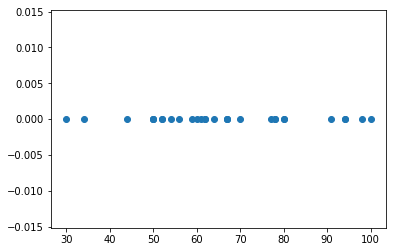

In [68]:
plt.scatter(X, np.zeros(30))

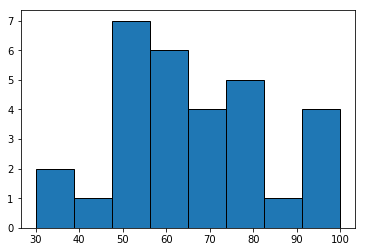

In [72]:
plt.hist(X, bins=8,edgecolor='black', linewidth=1)
plt.show()

**Question:** If we knew that these numbers came from a normal distribution $N(\mu, \sigma)$, what is the most likely normal distribution that this data would have come from?


**Answer:** It's the normal distribution $N(\mu, \sigma)$ where $\mu$ is the mean of the data, and $\sigma$ is the standard deviation of the data. Mean is the average of the data, standard deviation is the square root of the average of the square of the distance to the mean of the data... better to write down the formula:

$$\mu = \frac{1}{N}\sum_{i=1}^N x_i$$

$$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N (x_i - \mu)^2}$$

In python, we can use `np.mean` and `np.std` to compute these.

## Mean of a dataset vs Expected value of a random variable
If $X$ is a random variable:
$$\operatorname {E} [X]=\sum _{i=1}^{\infty }x_{i}\,p_{i},$$
or
$$\operatorname {E} [X] = \int _{-\infty }^{+\infty }x p(x)\,dx.$$

When the *mean* is discussed, we mean the *sample mean* (funny word play there). We compute the sample mean on a given set of samples, that is a set of **outcomes** of a probability distribution. This mean may yield different properties with regards to the estimation of the "actual average" of the underlying probability distribution. 
<br><br>
For instance you may consider how the mathematical definition of the sample mean behaves when passing to the limit (taking the sample size to infinity), etc. However the expected value above is functionally associated to distribution with a given parameter, a distribution that can further generate samples with different sample means.
<br><br>
If $\{x_i\}$ are samples drawn from the distribution for randome variable $X$, in general
$$
\mu = \frac{\sum_{k=1}^N x_i}{N}\neq \operatorname {E} [X] .
$$

In [73]:
mu, sigma = np.mean(X), np.std(X)
print("mean of the samples is: ", mu)
print("standard deviation of the samples is: ", sigma)

mean of the samples is:  66.03333333333333
standard deviation of the sameples is:  17.839064499637367


Recall that the Gaussian distribution $N(\mu, \sigma)$ has density function:

$$ p(x) = \frac{1}{\sqrt{2\pi}\sigma}\exp\left({-\frac{(x-\mu)^2}{2\sigma^2}}\right)$$

We will now draw the bell curve:


In [18]:
from math import sqrt, pi, e

In [75]:
N = 300 # grid size, not sample size
Z = np.linspace(0,100,N)

In [ ]:
# example of lambda
f = lambda xblahblahblah: xblahblahblah**2 + 1 # x^2 + 1

In [17]:
gaussian_func = lambda mu, sigma: (lambda x: 1/(sqrt(2*pi)*sigma) * e**(-0.5*(x - mu)*(x-mu)/(sigma**2)))

In [79]:
gaussian_func_musig = gaussian_func(0,1) # standard normal density function
type(gaussian_func_musig)

function

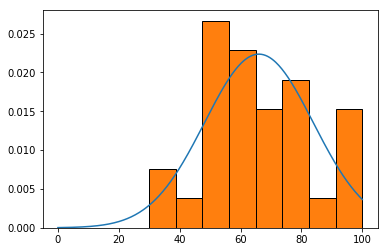

In [81]:
plt.plot(Z, guassian_func(mu, sigma)(Z)) # blue curve
plt.hist(X, bins= 8, density=True, edgecolor='black') 
# orange histogram, "density = True" means we plot the density histogram instead of the absolute numbers
plt.show()

**Conclusion:** For any data-set, the mean and standard deviation of the best-fitting Gaussian distribution are the mean and standard deviation of the data-set.

## Importing real life data (optional)

In this week's lab practice, we have seen how to import real life data on [UCI machine learning dataset repository](https://archive.ics.uci.edu/ml/datasets.html). Today we will try `numpy`'s built-in loading.

* Download `winequality-red.csv` from [https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/) and put it in the same directory with this notebook.
* Check the csv file using Excel on the lab computer. Import the data using the following command.

In [6]:
wine_data = np.loadtxt('winequality-red.csv', delimiter=';', skiprows=1) 
# without skiprows what happend
# this is why pandas is better...

In [7]:
wine_data = np.loadtxt('winequality-red.csv', delimiter=';', skiprows=1, usecols = [0,1,2])
# uses only first 3 columns

## In-class exercise:
Repeat above procedure for each column of wine_data.

In [12]:
# plt.hist first, then creat a linspace with max and min of each column using certain number of points
print("max is: ", max(wine_data[:,0]))
print("min is: ",min(wine_data[:,0]))

max is:  15.9
min is:  4.6


In [23]:
mu =  np.mean(wine_data[:,0])
sigma = np.std(wine_data[:,0])
print("mean is:", mu)
print("stanard dev is:", sigma)

mean is: 8.31963727329581
stanard dev is: 1.7405518001102729


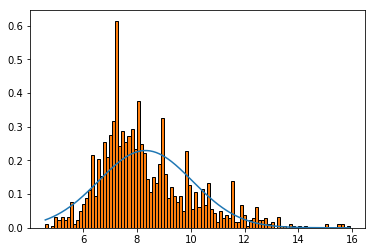

In [26]:
z = np.linspace(4.6, 15.9, 300)
plt.plot(z,gaussian_func(mu,sigma)(z))
plt.hist(wine_data[:,0], bins= 100, density=True, edgecolor='black')
plt.show()